In [1]:
import pysftp
import os 
import numpy as np
import pandas as pd
import netCDF4
import numpy as np

from scipy import io
from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from dotenv import load_dotenv   #for python-dotenv method
from datetime import datetime

/Users/joaojesus/opt/anaconda3/envs/geo_plotting/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import calendar

years = [year for year in range(2017,2021+1)]
months = [1, 2, 3, 4, 10, 11, 12]

year_days_dict = {}
for year in years:
    days_per_month = []
    for month in months:
        days_in_month = calendar.monthrange(year, month)[1]
        days_per_month.append(days_in_month)
        total_days = sum(days_per_month)

        year_days_dict[year] = total_days

year_days_dict

{2017: 212, 2018: 212, 2019: 212, 2020: 213, 2021: 212}

In [3]:
ds = netCDF4.Dataset('DO_NOT_DELETE_era5_2017_2021.nc')

np.savetxt("COORDINATES_ERA5_ONLINE/COORDINATES_ERA5_ONLINE_LON.csv", ds['longitude'], delimiter=",")
np.savetxt("COORDINATES_ERA5_ONLINE/COORDINATES_ERA5_ONLINE_LAT.csv", ds['latitude'], delimiter=",")

In [4]:
wind_eastward = ds['u'][:year_days_dict[2017]]# eastward


In [5]:
len(wind_eastward)

212

In [6]:
np.shape(wind_eastward)

(212, 241, 1440)

In [7]:
wind_eastward_2017_jan_01 = wind_eastward[0]

In [9]:
grid = map_grid(grid_size=None, source = 'era5_online')
wizard = data_wizard()

select_area_indexer = grid.select_area_indexer(
    min_lat= 60,
    max_lat= 90,
    min_lon= -180,
    max_lon= 180)

data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = wind_eastward_2017_jan_01)


TypeError: Dimensions of C (241, 1440) are incompatible with X (241) and/or Y (241); see help(pcolormesh)

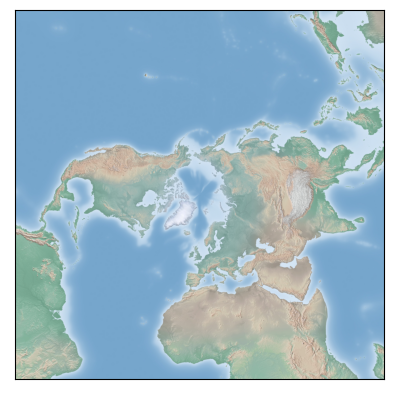

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure()
# fig, axes = plt.subplots(1, 2)

# axes[0].set_title("2018")
m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.grid_[0], grid.grid_[1], data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Mean wind at 10hpa on {date_string}')
plt.colorbar(label='Mean Wind in M/s')